In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df_store = pd.read_csv('store.csv')
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [172]:
df_train = pd.read_csv('train.csv', index_col='Date')
df_train.index = pd.to_datetime(df_train.index)

C:\ProgramData\anaconda3\envs\Ml_envs\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [173]:
df_train.is

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1


In [191]:
df_train.index.names = ['Timestamp']
df_train = df_train.sort_index()
df_train['month']= df_train.index.month
df_train['day']= df_train.index.day
df_train['year']= df_train.index.year
df_train['SalesPerCustomer'] = df_train['Sales']/df_train['Customers']
df_train['dayofweak'] = df_train.index.dayofweek

In [192]:
df_train['SalesPerCustomer'] = df_train['SalesPerCustomer'].fillna(0)
df_train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,day,year,SalesPerCustomer,dayofweak
Timestamp,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,1,1,2013,0.000000,1
2013-01-01,379,2,0,0,0,0,a,1,1,1,2013,0.000000,1
2013-01-01,378,2,0,0,0,0,a,1,1,1,2013,0.000000,1
2013-01-01,377,2,0,0,0,0,a,1,1,1,2013,0.000000,1
2013-01-01,376,2,0,0,0,0,a,1,1,1,2013,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,746,5,9082,638,1,1,0,1,7,31,2015,14.235110,4
2015-07-31,747,5,10708,826,1,1,0,1,7,31,2015,12.963680,4
2015-07-31,748,5,7481,578,1,1,0,1,7,31,2015,12.942907,4


In [196]:
plt.figure(figsize=(12, 8))
sns.hisplot(data = df_train, x = 'dayofweak', y = 'Sales')

AttributeError: module 'seaborn' has no attribute 'hisplot'

<Figure size 1200x800 with 0 Axes>

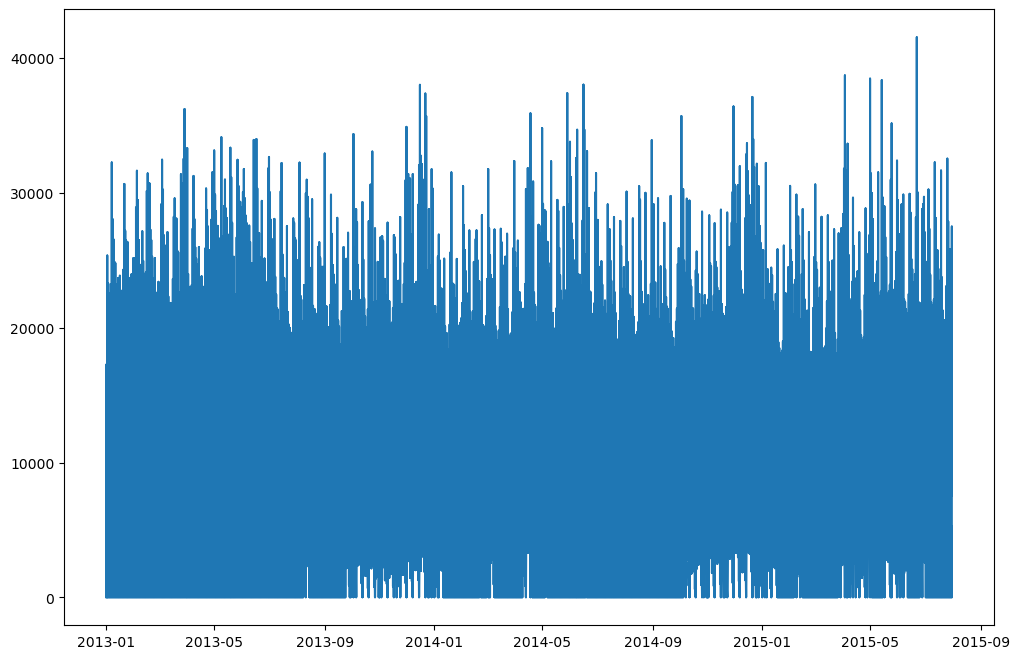

In [184]:
plt.figure(figsize=(12, 8))
plt.plot(df_train.index, df_train['Sales'])

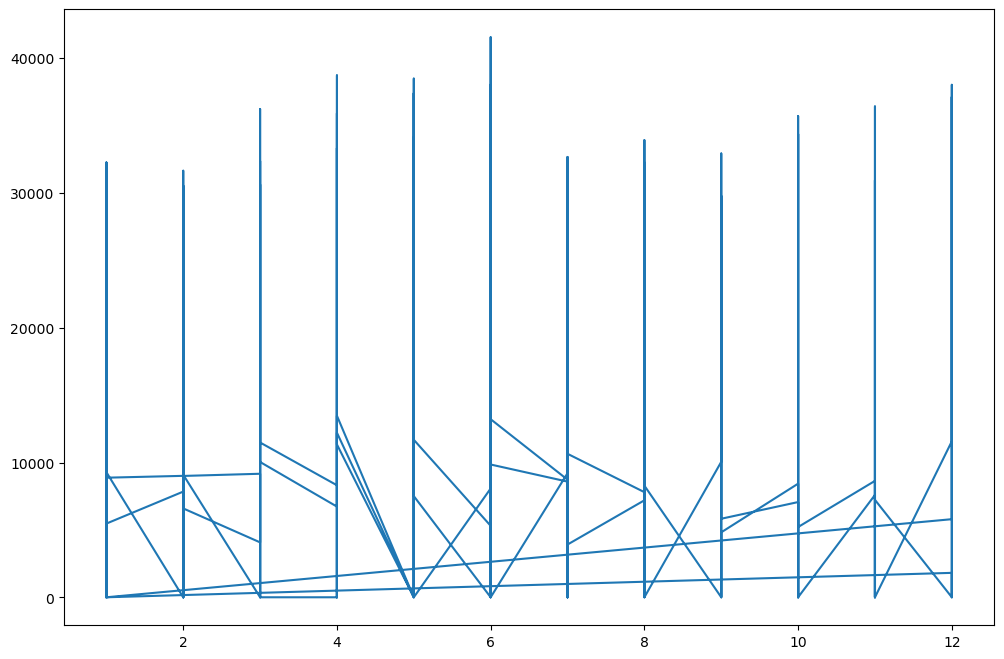

In [185]:
plt.figure(figsize=(12, 8))
plt.plot(df_train['month'], df_train['Sales'])